<a href="https://colab.research.google.com/github/msg030/Project/blob/master/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Mental Illness in Tech

Import libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from tqdm.autonotebook import tqdm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer,MultiLabelBinarizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing

Import the csv file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mental-heath-in-tech-2016_20161114.csv to mental-heath-in-tech-2016_20161114.csv


Read the csv file

In [ ]:
df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

Look at the first five entries

In [ ]:
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

Get statistics from the dataframe

In [ ]:
df.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


Get more statistics from the dataframe

In [ ]:
df.describe(include='all')

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

Get unique values of target column

In [ ]:
df["Do you currently have a mental health disorder?"].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [ ]:
index_names = df[df['Do you currently have a mental health disorder?'] == "Maybe"].index

In [ ]:
df.drop(index_names, inplace= True)

Get the unique values for the conditions column so I can recode some of the values

In [ ]:
df["If yes, what condition(s) have you been diagnosed with?"].unique()

array([nan,
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Stress Response Syndromes',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Stress Response Syndromes|Substance Use Disorder',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Substance Use Disorder',
       'Mood Disorder (Depression, Bipolar Disorder, etc)',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Obsessive-Compulsive Disorder',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Eating Disorder (Anorexia, Bulimia, etc)|Obsessive-Compulsive Disorder',
       'Personality Disorder (Borderline, Antisocial, Paranoid, etc)|Attention Deficit Hyperactivity Disorder',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depressi

Recode some values

In [ ]:
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(["Autism (Aspergers)",'PDD-NOS','Pervasive developmental disorder'],"Austism Spectrum Disorder")
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Anxiety Disorder (Generalized, Social, Phobia, etc)|Asperges'],"Anxiety Disorder (Generalized, Social, Phobia, etc)|Autism Spectrum Disorder")
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Post-traumatic Stress Disorder|Addictive Disorder|Autism'],'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Post-traumatic Stress Disorder|Addictive Disorder|Autism Spectrum Disorder')
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(["I haven't been formally diagnosed, so I felt uncomfortable answering, but Social Anxiety and Depression."],"Anxiety Disorder (Generalized, Social, Phobia, etc|Mood Disorder (Depression, Bipolar Disorder, etc)")
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Combination of physical impairment (strongly near-sighted) with a possibly mental one (MCD / "ADHD", though its actually a stimulus filtering impairment)'],"Attention Deficit Hyperactivity Disorder")
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Attention Deficit Hyperactivity Disorder|PTSD (undiagnosed)'],'Attention Deficit Hyperactivity Disorder|Post-traumatic Stress Disorder')
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Depression'],'Mood Disorder (Depression, Bipolar Disorder, etc)')
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Attention Deficit Hyperactivity Disorder|Pervasive Developmental Disorder (Not Otherwise Specified)'],'Attention Deficit Hyperactivity Disorder|Autism Spectrum Disorder')
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Transgender|Mood Disorder (Depression, Bipolar Disorder, etc)|Anxiety Disorder (Generalized, Social, Phobia, etc)'],"Gender Dysphoria|Mood Disorder (Depression, Bipolar Disorder, etc)|Anxiety Disorder (Generalized, Social, Phobia, etc)")
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Anxiety Disorder (Generalized, Social, Phobia, etc)|Dissociative Disorder|Autism'],'Anxiety Disorder (Generalized, Social, Phobia, etc)|Dissociative Disorder|Autism Spectrum Disorder')
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Dissociative Disorder|Autism'],'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Dissociative Disorder|Autism Spectrum Disorder')
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Psychotic Disorder (Schizophrenia, Schizoaffective, etc)|Obsessive-Compulsive Disorder|ADD (w/o Hyperactivity)'],'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)|Obsessive-Compulsive Disorder|Attention Deficit Hyperactivity Disorder')
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Schizotypal Personality Disorder'],'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)')
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Anxiety Disorder (Generalized, Social, Phobia, etc)|Post-traumatic Stress Disorder|Stress Response Syndromes|Autism spectrum disorder'],'Anxiety Disorder (Generalized, Social, Phobia, etc)|Post-traumatic Stress Disorder|Stress Response Syndromes|Autism Spectrum Disorder')
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(["Sexual addiction"],"Other")
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Traumatic Brain Injury'],"Other")
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Burn out'],'Other')
df["If yes, what condition(s) have you been diagnosed with?"] = df["If yes, what condition(s) have you been diagnosed with?"].replace(['Seasonal Affective Disorder'], 'Other')                                                                                                                                      

Get value counts of conditions values

In [ ]:
df["If yes, what condition(s) have you been diagnosed with?"].value_counts()

Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                                      117
Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                                                                                          103
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                                                                                                                         47
Anxiety Disorder (Generalized, Social, Phob

Drop the rows that are NaN

Fix errors in the age column

In [ ]:
df["What is your age?"].unique()

array([ 39,  29,  38,  43,  42,  30,  37,  44,  28,  34,  35,  52,  32,
        25,  31,  26,  33,  27,  36,  40,  46,  41,  19,  21,  24,  17,
        23,  22,  51,  48,  45,  50,  55,  49,  54,  47,  56,  57,  63,
        99,  61,  20, 323,  62,  53,  58,  66,  59,  15,  65,  74,  70])

In [ ]:
df.loc[(df['What is your age?'] >90 ), "What is your age?"] =  34
df.loc[(df["What is your age?"] < 17),"What is your age?"] = 34 

Get the unique values for gender

In [ ]:
df["What is your gender?"].unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cis male', 'Male.', nan, 'Male (cis)', 'Other', 'man',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'cis male', 'Human', 'Genderfluid', 'Malr', 'genderqueer woman',
       'mtf', 'Queer', 'Agender', 'Dude', 'mail', 'M|',
       'Male/genderqueer', 'fem', 'Nonbinary', ' Female', 'Unicorn',
       'Cis Male', 'Male (trans, FtM)', 'Cis-woman', 'Genderqueer',
       'cisdude', 'Genderflux demi-girl', 'cis man', 'AFAB', 'male ',
       'Transgender woman', 'MALE'], dtype=object)

Recode the gender column into three distinct categories male, female, genderqueer/other or 0,1,2

In [ ]:
df["What is your gender?"]=df["What is your gender?"].replace(["male","Male ","Male","male ","M","m","man","Cis male","Male.","Male (cis)", "Man", "Sex is male", "cis male","Malr","Dude", "I'm a man why didn't you make this a drop down question. You should have asked sex? And I would of answered yes please. Seriously how much text can this take?","mail","M|","male","Cis Male","Male (trans, FtM)","cisdude","cis man","MALE"], 0)
df["What is your gender?"]=df["What is your gender?"].replace(['female',"Female","I identify as female.","female ","Female assigned at birth ","F","Woman","fm","f","Cis female","Transitioned, M2F","Female or Multi-Gender Femme","Female ","woman","female/woman","Cisgender Female","mtf","fem", "Female (props for making this a freeform field, though)"," Female", "Cis-woman", "AFAB","Transgender woman", "Cis female "], 1)
df["What is your gender?"]=df["What is your gender?"].replace(["Bigender","non-binary","Genderfluid (born female)","Other/Transfeminine","Androgynous","male 9:1 female, roughly", "Other","nb masculine","none of your business","genderqueer","Human","Genderfluid","'Enby","genderqueer woman","Queer","Agender","Fluid","Male/genderqueer","Nonbinary","human","Unicorn","Genderqueer","Genderflux demi-girl","female bodied; no feelings about gender"], 2)

Replace the one NaN with the mode Male

In [ ]:
df["What is your gender?"]=df["What is your gender?"].replace(np.NaN,0)

Fix an error in the gender column

In [ ]:
df["What is your gender?"]=df["What is your gender?"].replace('Male',0)

In [ ]:
df['What is your gender?'].unique()

array([0., 1., 2.])

Drop all columns where more than half of the observations have missing values

In [ ]:
cols = (df.isna().sum() >= df.shape[0]/2).tolist()
drop = df.columns[cols]
df.drop(labels=drop, axis=1, inplace= True)

Impute NaN with the mode on every row

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df)
imp_data = pd.DataFrame(data = imp.transform(df), columns = df.columns)

Describe the dataset

In [ ]:
imp_data.describe()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do y

In [ ]:
imp_data

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do y

## Visualizations

Get Gender statistics

In [ ]:
df["What is your gender?"].value_counts()

0.0    801
1.0    286
2.0     19
Name: What is your gender?, dtype: int64

Charts and Figures

Text(0.5, 1.0, 'Overall gender prop%')

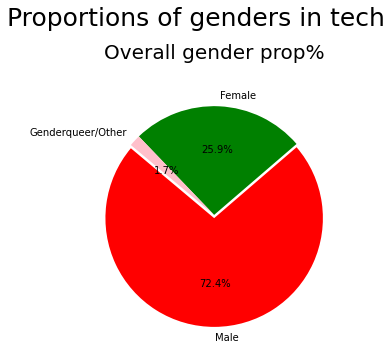

<Figure size 1152x360 with 0 Axes>

In [ ]:
fig,ax1 = plt.subplots(figsize=(6,3), subplot_kw=dict(aspect="equal") )
plt.figure(figsize = (16,5))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle("Proportions of genders in tech", fontsize = 25, y=1.08)

all_techs = imp_data['What is your gender?'].count()
males = imp_data[imp_data["What is your gender?"]==0]["What is your gender?"].count()
females = imp_data[imp_data["What is your gender?"]==1]["What is your gender?"].count()
other = imp_data[imp_data["What is your gender?"]==2]["What is your gender?"].count()

labels = "Male","Female","Genderqueer/Other"
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['red','green','pink']
explode = (.03,0,0)

ax1.pie(sizes,explode=explode,labels=labels, colors=colors,autopct='%1.1f%%',shadow = False, startangle=140)
ax1.set_title("Overall gender prop%", pad = 20, fontsize=20)



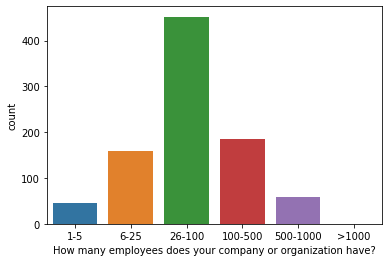

In [ ]:
sns.countplot(x=imp_data["How many employees does your company or organization have?"],order= ['1-5','6-25','26-100','100-500','500-1000','>1000'])

In [ ]:
imp_data['What is your age?'].describe()

count     1106
unique      49
top         30
freq        70
Name: What is your age?, dtype: int64

In [ ]:
imp_data['What is your age?'].unique()

array([39, 29, 38, 43, 42, 30, 37, 44, 28, 34, 35, 52, 32, 25, 31, 26, 33,
       27, 36, 40, 46, 41, 19, 21, 24, 17, 23, 22, 51, 48, 45, 50, 55, 49,
       54, 47, 56, 57, 63, 61, 20, 62, 53, 58, 66, 59, 65, 74, 70],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


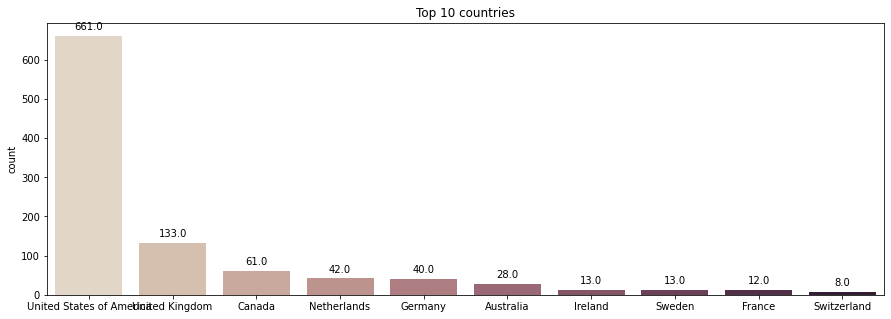

In [ ]:
country_count = df['What country do you live in?'].value_counts().sort_values(ascending=False).to_frame()[:10]
country_count = country_count.rename(columns={'What country do you live in?': 'count'})
plt.figure(figsize=(15,5))
ax = sns.barplot(country_count.index,y='count', data=country_count, palette="ch:.25")
for p in ax.patches:
  ax.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()), ha = 'center', va = 'center',xytext=(0,9), textcoords = 'offset points')
ax = ax.set_title("Top 10 countries")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


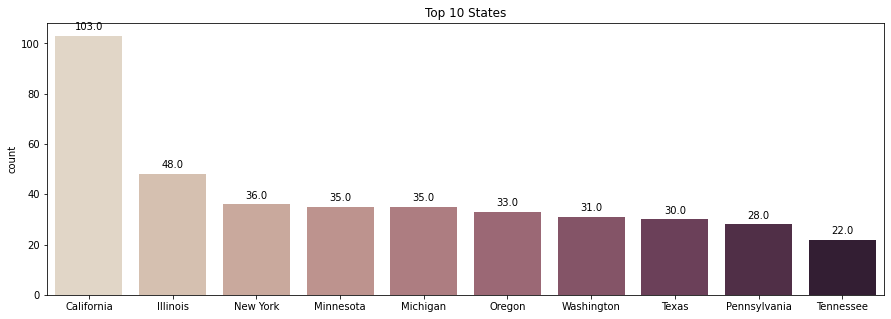

In [ ]:
state_count = df['What US state or territory do you live in?'].value_counts().sort_values(ascending=False).to_frame()[:10]
state_count = state_count.rename(columns={'What US state or territory do you live in?':'count'})
plt.figure(figsize=(15,5))
ax = sns.barplot(state_count.index, y='count', data=state_count, palette="ch:.25")
for p in ax.patches:
  ax.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()), ha='center',va='center',xytext=(0,9), textcoords="offset points")
ax = ax.set_title('Top 10 States')

##Encoding the data

In [ ]:
cols = [x for x in imp_data.columns if x not in ["What is your gender?","What is your age?","Why or why not?","Why or why not?.1","What country do you live in?","What US state or territory do you live in?","What country do you work in?","What US state or territory do you work in?","Which of the following best describes your work position?"]]
data_to_encode = imp_data[cols]
data_not_encode = imp_data[["What is your gender?","What is your age?","Why or why not?","Why or why not?.1","What country do you live in?","What US state or territory do you live in?","What country do you work in?","What US state or territory do you work in?","Which of the following best describes your work position?"]]
data_not_encode["What is your gender?"] = data_not_encode["What is your gender?"].astype('int64')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
def encode(data):
  cat_columns = list(data.select_dtypes(include=['category','object']))
  mlb = MultiLabelBinarizer()

  for col in cat_columns:
    data[col] = data[col].astype('str')
    data[col]=mlb.fit_transform(data[col])
  
  return data

encode(data_to_encode)
matrix = encode(data_to_encode)
encoded_data = pd.DataFrame(matrix)
encoded_data.columns = data_to_encode.columns
prep_data = pd.concat(objs = [encoded_data, data_not_encode], axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
prep_data

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Do you work remotely?,What is your gender?,What is your age?,Why or why not?,Why or why no

In [ ]:
model_data = prep_data.copy()
col_numeric = [cols for cols in model_data.columns if model_data[cols].dtype in ['int64','float64']]
model_data = model_data[col_numeric]

In [ ]:
model_data

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?",Have you been diagnosed with a mental health condition by a medical professional?,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Do you work remotely?,What is your gender?
0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1

#Demographic Data

In [ ]:
prep_data[["What is your gender?","Do you currently have a mental health disorder?"]].value_counts(normalize=True)*100

What is your gender?  Do you currently have a mental health disorder?
0                     1                                                  38.878843
                      0                                                  33.544304
1                     0                                                  16.817360
                      1                                                   9.041591
2                     0                                                   1.627486
                      1                                                   0.090416
dtype: float64

## Making Predictions

In [ ]:
y = model_data['Do you currently have a mental health disorder?']

cols = [col for col in model_data.columns if col not in ['Do you currently have a mental health disorder?']]
X = model_data[cols]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42)

In [ ]:
X_test["What is your gender?"].unique()

array([0, 2, 1])

In [ ]:
def model_assess(model,name='Default'):
  model.fit(X_train,y_train)
  preds = model.predict(X_test)
  print('---',name,'---','\n',confusion_matrix(y_test,preds),'\n','Accuracy:', round(accuracy_score(y_test, preds),5),'\n')

In [ ]:
nb = GaussianNB()
model_assess(nb, name='Naive Bayes')
cross_val_score(nb,X,y,n_jobs = -1)

--- Naive Bayes --- 
 [[91 27]
 [13 91]] 
 Accuracy: 0.81982 



array([0.80630631, 0.80090498, 0.78280543, 0.74208145, 0.78280543])

In [ ]:
sgd = SGDClassifier(max_iter=5000, random_state=42)
model_assess(sgd, name='SGD')
cross_val_score(sgd,X,y,n_jobs = -1)

--- SGD --- 
 [[102  16]
 [ 16  88]] 
 Accuracy: 0.85586 



array([0.89189189, 0.87330317, 0.90497738, 0.88687783, 0.53846154])

In [ ]:
tree = DecisionTreeClassifier()
model_assess(tree,"Decision Trees")
cross_val_score(tree,X,y,n_jobs = -1)

--- Decision Trees --- 
 [[103  15]
 [ 23  81]] 
 Accuracy: 0.82883 



array([0.86486486, 0.81447964, 0.78733032, 0.82352941, 0.80542986])

In [ ]:
rforest = RandomForestClassifier(max_depth= 10, random_state=42)
model_assess(rforest,"Random Forest")
cross_val_score(rforest,X,y,n_jobs=-1)

--- Random Forest --- 
 [[112   6]
 [ 23  81]] 
 Accuracy: 0.86937 



array([0.88738739, 0.85520362, 0.88687783, 0.87330317, 0.84162896])